In [1]:
import pandas as pd
import numpy as np 

import seaborn as sns 
import matplotlib.pylab as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from scipy.stats import norm
from scipy import stats

In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0232EN-SkillsNetwork/asset/Ames_Housing_Data1.tsv", sep='\t')
df

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
2,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
3,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
4,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2926,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2927,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2928,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2929,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2931 entries, 0 to 2930
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2931 non-null   int64  
 1   PID              2931 non-null   int64  
 2   MS SubClass      2931 non-null   int64  
 3   MS Zoning        2931 non-null   object 
 4   Lot Frontage     2441 non-null   float64
 5   Lot Area         2931 non-null   int64  
 6   Street           2931 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2931 non-null   object 
 9   Land Contour     2931 non-null   object 
 10  Utilities        2931 non-null   object 
 11  Lot Config       2931 non-null   object 
 12  Land Slope       2931 non-null   object 
 13  Neighborhood     2931 non-null   object 
 14  Condition 1      2931 non-null   object 
 15  Condition 2      2931 non-null   object 
 16  Bldg Type        2931 non-null   object 
 17  House Style   

In [4]:
df['Sale Condition'].describe() # observe the distribution

count       2931
unique         6
top       Normal
freq        2414
Name: Sale Condition, dtype: object

In [5]:
df['Sale Condition'].value_counts() # count values and return a df about all elements and their counts
# We see that this is a categorical feature

Sale Condition
Normal     2414
Partial     245
Abnorml     190
Family       46
Alloca       24
AdjLand      12
Name: count, dtype: int64

In [6]:
numdf=df.select_dtypes(include=['float64','int64']) # ★ filter data with specific datatype
# df.select_dtypes(exclude=['object']) # ★ filter str data (string type is not allowed)

In [7]:
corrmat=numdf.corr() # all pearson correlation between each 2 features
corrmat

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
Order,1.000000,0.174064,0.012307,-0.009185,0.029680,-0.048436,-0.010749,-0.052070,-0.074823,-0.030924,...,-0.011828,0.016220,0.028105,-0.024902,0.004473,0.052528,-0.006027,0.133557,-0.976016,-0.031644
PID,0.174064,1.000000,-0.000983,-0.097977,0.033885,-0.263079,0.104601,-0.343194,-0.156652,-0.229263,...,-0.051432,-0.071371,0.162610,-0.024855,-0.025633,-0.002823,-0.008228,-0.050292,0.009002,-0.246617
MS SubClass,0.012307,-0.000983,1.000000,-0.420349,-0.205144,0.039434,-0.067186,0.036686,0.043729,0.002713,...,-0.017580,-0.014885,-0.022755,-0.037920,-0.050521,-0.003415,-0.029224,0.000484,-0.018396,-0.085206
Lot Frontage,-0.009185,-0.097977,-0.420349,1.000000,0.493490,0.211549,-0.074949,0.120906,0.090074,0.222060,...,0.121088,0.162998,0.012272,0.028386,0.076158,0.173528,0.044279,0.010496,-0.005426,0.357141
Lot Area,0.029680,0.033885,-0.205144,0.493490,1.000000,0.097001,-0.035187,0.022877,0.020562,0.126719,...,0.157848,0.103826,0.021504,0.016126,0.054706,0.093596,0.069016,0.003435,-0.021476,0.266600
Overall Qual,-0.048436,-0.263079,0.039434,0.211549,0.097001,1.000000,-0.094796,0.597021,0.569504,0.429416,...,0.255604,0.298405,-0.140321,0.018243,0.041621,0.030401,0.005181,0.031113,-0.020748,0.799226
Overall Cond,-0.010749,0.104601,-0.067186,-0.074949,-0.035187,-0.094796,1.000000,-0.368683,0.047868,-0.135344,...,0.020181,-0.068968,0.071516,0.043868,0.044102,-0.016775,0.034070,-0.007217,0.030901,-0.101763
Year Built,-0.052070,-0.343194,0.036686,0.120906,0.022877,0.597021,-0.368683,1.000000,0.612088,0.313278,...,0.228807,0.198331,-0.374301,0.015816,-0.041398,0.002221,-0.010999,0.014634,-0.013405,0.558340
Year Remod/Add,-0.074823,-0.156652,0.043729,0.090074,0.020562,0.569504,0.047868,0.612088,1.000000,0.196860,...,0.217410,0.241605,-0.220185,0.037445,-0.046763,-0.011383,-0.003096,0.018221,0.031963,0.532664
Mas Vnr Area,-0.030924,-0.229263,0.002713,0.222060,0.126719,0.429416,-0.135344,0.313278,0.196860,1.000000,...,0.165461,0.143751,-0.110791,0.013776,0.065637,0.004616,0.044932,-0.000285,-0.017674,0.508277


In [8]:
topposCorrsmat,topnegCorrsmat=corrmat[corrmat[corrmat<1]>0.5].dropna(how="all"),corrmat[corrmat<-0.5].dropna(how="all")
# only display neg corr
topnegCorrsmat

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
Order,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.976016,NaN
Yr Sold,-0.976016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# pick out all numbers and get rid of NaNs
salepriceCorr=topposCorrsmat['SalePrice'].sort_values(ascending=False),topnegCorrsmat['SalePrice'].sort_values(ascending=False)
topCorrsmat=pd.concat([salepriceCorr[0],salepriceCorr[1]]).dropna()
topCorrsmat

Overall Qual      0.799226
Gr Liv Area       0.706791
Garage Cars       0.647891
Garage Area       0.640411
Total Bsmt SF     0.632270
1st Flr SF        0.621672
Year Built        0.558340
Full Bath         0.545339
Year Remod/Add    0.532664
Garage Yr Blt     0.526808
Mas Vnr Area      0.508277
Name: SalePrice, dtype: float64

C:\Users\Fynn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


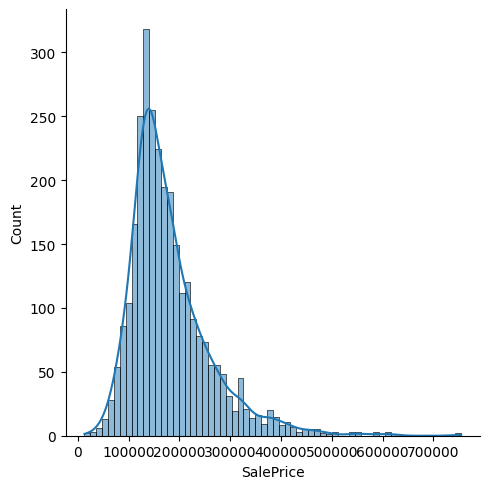

In [10]:
sns.displot(df['SalePrice'],kde=True) # histogram with a line

### Handling duplication

In [11]:
# Enter your code and run the cell
df[df.duplicated('Order')]
# Why is this the same effect? ↓↓↓↓↓
df[df.Order.duplicated()]

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000


In [12]:
df

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
2,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
3,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
4,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2926,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2927,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2928,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2929,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000
